### Execution time analysis for minimum algorithms

This notebook wants to highlight the differences in term of execution time of the various algorithm used, the comparision is made between:
- Serial algorithm
- GPU algorithm using atomic operation on a global variable
- GPU Optimistic algorithm 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("time_analysis.csv", header=0, names=["type", "size", "time[us]"])
data.head()

,type,size,time[us]
0,atomic,100,154036
1,serial,100,1
2,optimistic,100,151
3,atomic,100,151334
4,serial,100,1


In [3]:
average_time = data.groupby(["type", "size"]).mean()
average_time

time[us]
type       size                   
atomic     100        1.478587e+05
           500        1.437551e+05
           1000       1.411010e+05
           5000       1.419932e+05
           10000      1.414126e+05
           100000     1.407802e+05
           500000     1.418886e+05
           1000000    1.445507e+05
           10000000   1.536357e+05
           100000000  2.431103e+05
optimistic 100        1.513750e+02
           500        1.382222e+02
           1000       1.451111e+02
           5000       1.480000e+02
           10000      1.430000e+02
           100000     1.417778e+02
           500000     1.410000e+02
           1000000    1.391667e+02
           10000000   1.533333e+02
           100000000  2.386667e+02
serial     100        1.000000e+00
           500        5.000000e+00
           1000       1.000000e+01
           5000       5.211111e+01
           10000      1.014444e+02
           100000     1.033111e+03
           500000     5.045444e+03
           1000000    1.015700e+04
           10000000   1.004020e+05
           100000000  1.006782e+06

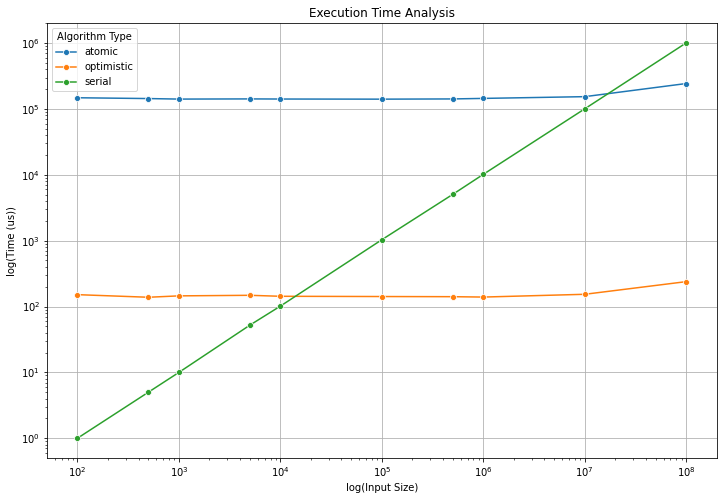

In [4]:
average_time_reset = average_time.reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=average_time_reset, x='size', y='time[us]', hue='type', marker='o')
plt.title('Execution Time Analysis')
plt.xlabel('log(Input Size)')
plt.xscale('log')
plt.ylabel('log(Time (us))')
plt.yscale('log')
plt.legend(title='Algorithm Type')
plt.grid(True)
plt.show()

From the plot we can see how the atomic method works bad, this behaviour is caused by the atomic operation which slows down the code. We can see insead a very good speed-up for arrays with size greater then 10000 elements.